In [10]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [8]:
class KNNClassifier:
    def __init__(self, k=3, metric = 'euclidean'):
        self.k = k
        self.metric = metric.lower()

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def _compute_distance(self, x1, x2):
        if self.metric == 'euclidean':
            return np.sqrt(np.sum((x1 - x2) ** 2))
        elif self.metric == 'manhattan':
            return np.sum(np.abs(x1 - x2))
        elif self.metric == 'chebyshev':
            return np.max(np.abs(x1 - x2))
        else:
            raise ValueError(f"Unsupported distance metric: {self.metric}")

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            distances = [self._compute_distance(x, x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_labels = self.y_train[k_indices]
            most_common = Counter(k_labels).most_common(1)[0][0]
            predictions.append(most_common)
        return np.array(predictions)
            

In [9]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# --- Данные ---
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Твоя модель ---
my_knn = KNNClassifier(k=5, metric='euclidean')
my_knn.fit(X_train, y_train)
y_pred_my = my_knn.predict(X_test)

# --- sklearn ---
sk_knn = KNeighborsClassifier(n_neighbors=5)
sk_knn.fit(X_train, y_train)
y_pred_sk = sk_knn.predict(X_test)

# --- Оценка ---
print("Custom KNN Accuracy:", accuracy_score(y_test, y_pred_my))
print("sklearn KNN Accuracy:", accuracy_score(y_test, y_pred_sk))


Custom KNN Accuracy: 0.8
sklearn KNN Accuracy: 0.8


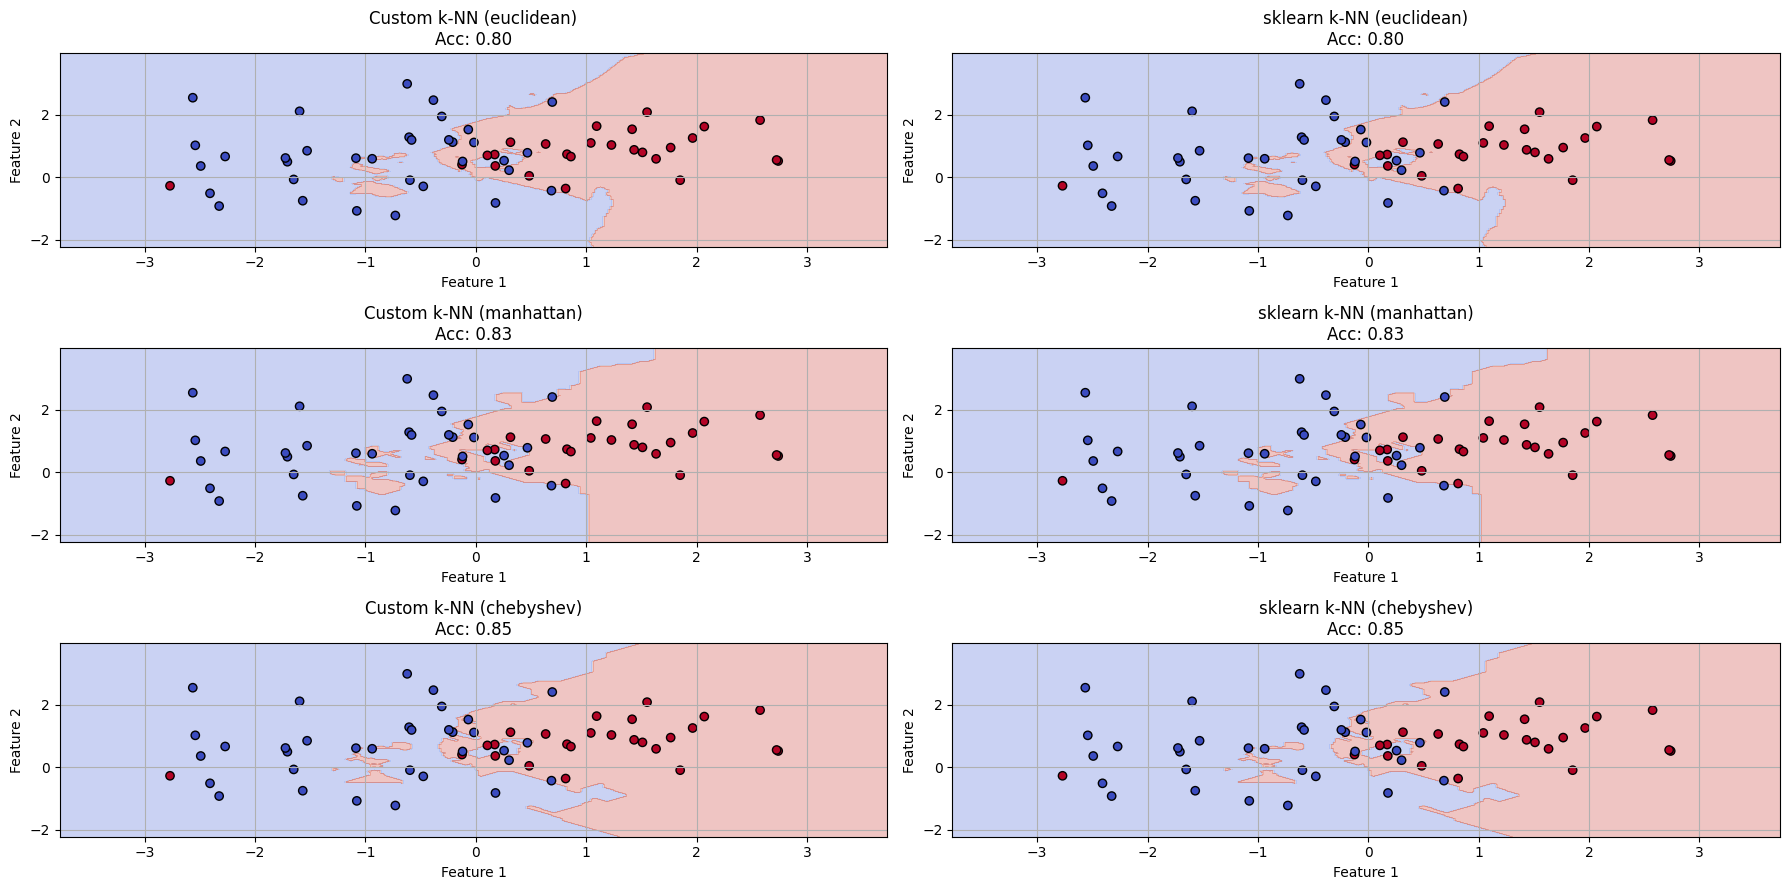

In [11]:


X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

metrics = ['euclidean', 'manhattan', 'chebyshev']

def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)

# Рисуем
plt.figure(figsize=(18, 9))
for i, metric in enumerate(metrics):
    # Custom model
    my_knn = KNNClassifier(k=5, metric=metric)
    my_knn.fit(X_train, y_train)
    y_pred_my = my_knn.predict(X_test)
    acc_my = accuracy_score(y_test, y_pred_my)

    # Sklearn model
    sk_knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    sk_knn.fit(X_train, y_train)
    y_pred_sk = sk_knn.predict(X_test)
    acc_sk = accuracy_score(y_test, y_pred_sk)

    # Plot Custom
    plt.subplot(3, 2, 2*i+1)
    plot_decision_boundary(my_knn, X_test, y_test,
                           f"Custom k-NN ({metric})\nAcc: {acc_my:.2f}")

    # Plot Sklearn
    plt.subplot(3, 2, 2*i+2)
    plot_decision_boundary(sk_knn, X_test, y_test,
                           f"sklearn k-NN ({metric})\nAcc: {acc_sk:.2f}")

plt.tight_layout()
plt.show()


### KNN regressor

In [12]:
import numpy as np

class KNNRegressor:
    def __init__(self, k=3, metric='euclidean'):
        self.k = k
        self.metric = metric.lower()

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def _compute_distance(self, x1, x2):
        if self.metric == 'euclidean':
            return np.sqrt(np.sum((x1 - x2) ** 2))
        elif self.metric == 'manhattan':
            return np.sum(np.abs(x1 - x2))
        elif self.metric == 'chebyshev':
            return np.max(np.abs(x1 - x2))
        else:
            raise ValueError(f"Unsupported distance metric: {self.metric}")

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            distances = [self._compute_distance(x, x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_targets = self.y_train[k_indices]
            predictions.append(np.mean(k_targets))
        return np.array(predictions)


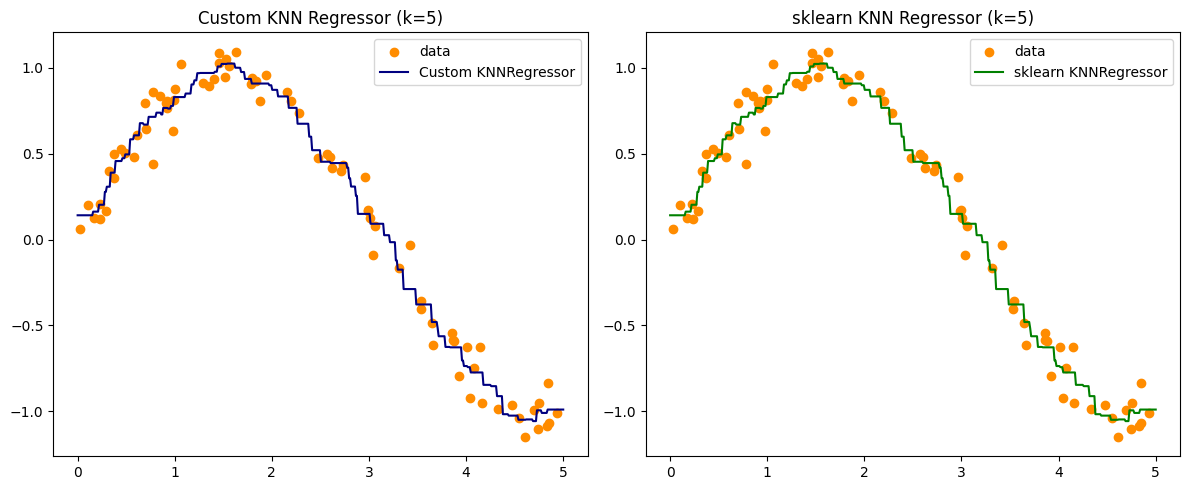

In [13]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

# --- Данные ---
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + 0.1 * np.random.randn(80)

X_test = np.linspace(0, 5, 500).reshape(-1, 1)

# --- Моя модель ---
my_knn = KNNRegressor(k=5, metric='euclidean')
my_knn.fit(X, y)
y_pred_my = my_knn.predict(X_test)

# --- Sklearn модель ---
sk_knn = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
sk_knn.fit(X, y)
y_pred_sk = sk_knn.predict(X_test)

# --- Визуализация ---
plt.figure(figsize=(12, 5))

# Твоя модель
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X_test, y_pred_my, color='navy', label='Custom KNNRegressor')
plt.title("Custom KNN Regressor (k=5)")
plt.legend()

# Sklearn модель
plt.subplot(1, 2, 2)
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X_test, y_pred_sk, color='green', label='sklearn KNNRegressor')
plt.title("sklearn KNN Regressor (k=5)")
plt.legend()

plt.tight_layout()
plt.show()


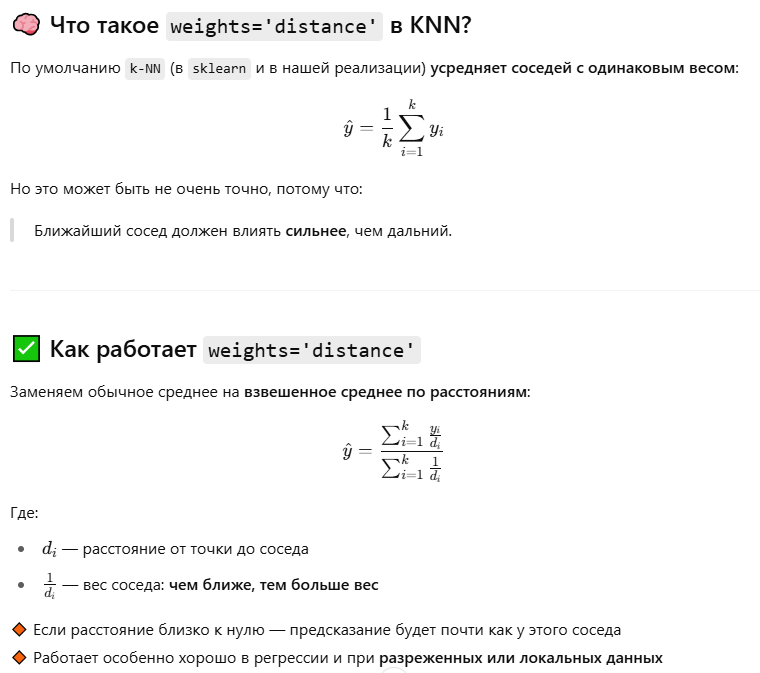

In [14]:
from IPython.display import Image
Image('knn_weight.png')

In [15]:
class KNNRegressor:
    def __init__(self, k=3, metric='euclidean', weights='uniform'):
        self.k = k
        self.metric = metric.lower()
        self.weights = weights.lower()

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def _compute_distance(self, x1, x2):
        if self.metric == 'euclidean':
            return np.sqrt(np.sum((x1 - x2) ** 2))
        elif self.metric == 'manhattan':
            return np.sum(np.abs(x1 - x2))
        elif self.metric == 'chebyshev':
            return np.max(np.abs(x1 - x2))
        else:
            raise ValueError(f"Unsupported distance metric: {self.metric}")

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            distances = [self._compute_distance(x, x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_targets = self.y_train[k_indices]
            k_distances = np.array(distances)[k_indices]

            if self.weights == 'uniform':
                prediction = np.mean(k_targets)
            elif self.weights == 'distance':
                # Чтобы избежать деления на 0:
                k_distances = np.where(k_distances == 0, 1e-10, k_distances)
                weights = 1 / k_distances
                prediction = np.dot(weights, k_targets) / np.sum(weights)
            else:
                raise ValueError(f"Unsupported weights: {self.weights}")

            predictions.append(prediction)

        return np.array(predictions)


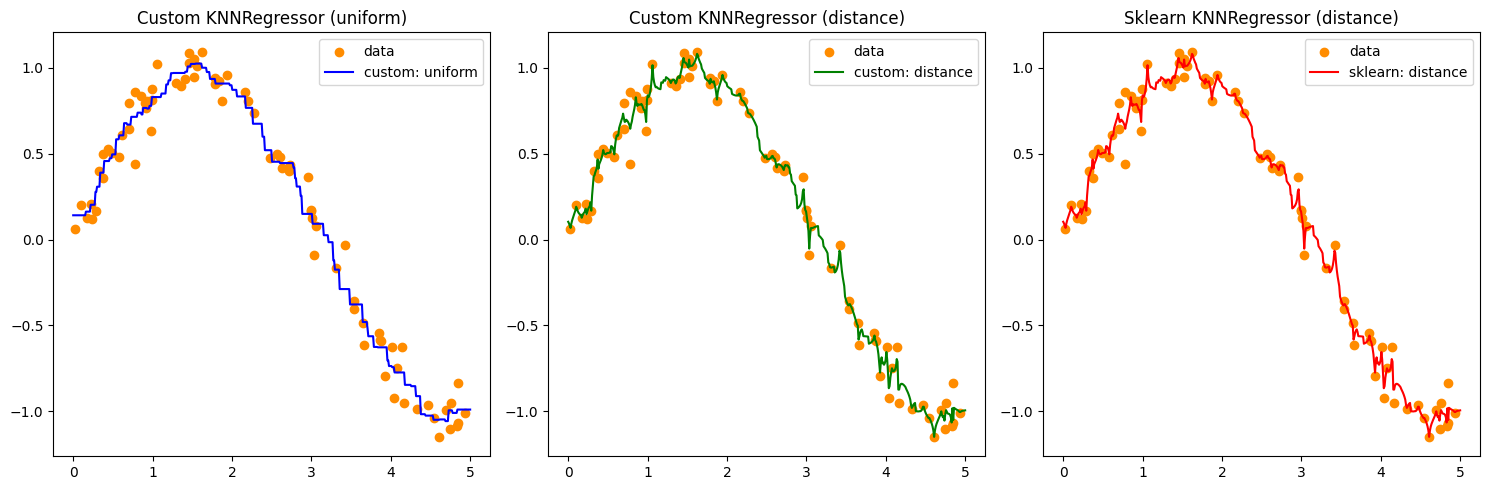

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

# --- Генерация данных ---
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + 0.1 * np.random.randn(80)

X_test = np.linspace(0, 5, 500).reshape(-1, 1)

# --- Твоя модель: uniform weights ---
model_uniform = KNNRegressor(k=5, weights='uniform')
model_uniform.fit(X, y)
y_pred_uniform = model_uniform.predict(X_test)

# --- Твоя модель: distance weights ---
model_distance = KNNRegressor(k=5, weights='distance')
model_distance.fit(X, y)
y_pred_distance = model_distance.predict(X_test)

# --- Sklearn для сравнения (distance) ---
sk_model = KNeighborsRegressor(n_neighbors=5, weights='distance')
sk_model.fit(X, y)
y_pred_sk = sk_model.predict(X_test)

# --- Визуализация ---
plt.figure(figsize=(15, 5))

# uniform
plt.subplot(1, 3, 1)
plt.scatter(X, y, c='darkorange', label='data')
plt.plot(X_test, y_pred_uniform, c='blue', label='custom: uniform')
plt.title("Custom KNNRegressor (uniform)")
plt.legend()

# distance
plt.subplot(1, 3, 2)
plt.scatter(X, y, c='darkorange', label='data')
plt.plot(X_test, y_pred_distance, c='green', label='custom: distance')
plt.title("Custom KNNRegressor (distance)")
plt.legend()

# sklearn distance
plt.subplot(1, 3, 3)
plt.scatter(X, y, c='darkorange', label='data')
plt.plot(X_test, y_pred_sk, c='red', label='sklearn: distance')
plt.title("Sklearn KNNRegressor (distance)")
plt.legend()

plt.tight_layout()
plt.show()


In [17]:
import pandas as pd
import numpy as np

# Генерация примера (если нет своего CSV)
np.random.seed(0)
temperature = np.linspace(10, 35, 50)
sales = 20 * temperature + 30 + np.random.randn(50) * 20

df = pd.DataFrame({
    'Temperature': temperature,
    'Sales': sales
})

df.to_csv("ice_cream.csv", index=False)


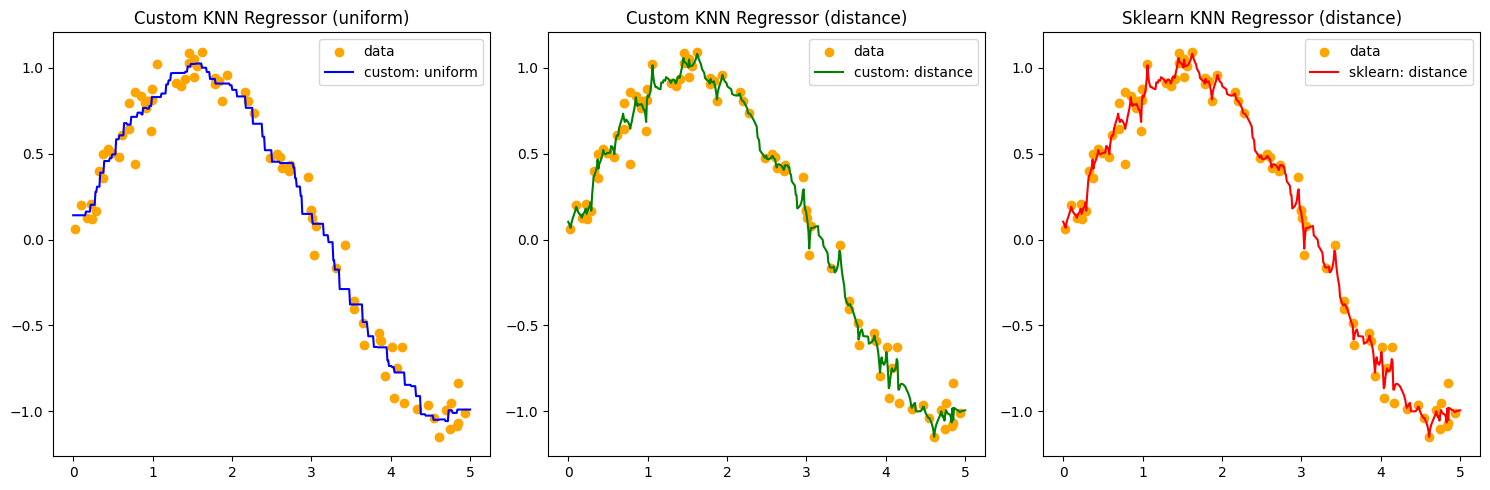

In [18]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

# Моя модель — uniform
model_uniform = KNNRegressor(k=5, weights='uniform')
model_uniform.fit(X, y)
y_pred_uniform = model_uniform.predict(X_test)

# Моя модель — distance
model_distance = KNNRegressor(k=5, weights='distance')
model_distance.fit(X, y)
y_pred_distance = model_distance.predict(X_test)

# Sklearn модель для сравнения
sk_model = KNeighborsRegressor(n_neighbors=5, weights='distance')
sk_model.fit(X, y)
y_pred_sk = sk_model.predict(X_test)

# Визуализация
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X, y, color='orange', label='data')
plt.plot(X_test, y_pred_uniform, color='blue', label='custom: uniform')
plt.title("Custom KNN Regressor (uniform)")
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(X, y, color='orange', label='data')
plt.plot(X_test, y_pred_distance, color='green', label='custom: distance')
plt.title("Custom KNN Regressor (distance)")
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(X, y, color='orange', label='data')
plt.plot(X_test, y_pred_sk, color='red', label='sklearn: distance')
plt.title("Sklearn KNN Regressor (distance)")
plt.legend()

plt.tight_layout()
plt.show()
